In [1]:
import src.utils as pth
import pandas as pd
import os

PROJECT_ROOT = pth.get_project_root()

In [2]:

db_train = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'train_data_processed.parquet'))  

db_valid = pd.read_parquet(os.path.join(PROJECT_ROOT, 'data', 'processed', 'validate_data_processed.parquet'))


In [3]:
db_train.head(2)

,id,title,image_name,color,clean_title,clean_color,caption
754,30695,rosehip fit flare dress,db2a1e93-3a6c-4c05-bf18-00ee6be05bd3.jpeg,Tomato,rosehip fit flare dress,tomato,tomato rosehip fit flare dress
6292,81404,live in pocket joggers pants,285af35b-a2b9-40d0-a153-2852a6106ba9.jpeg,Black,live in pocket joggers pants,black,black live in pocket joggers pants


In [3]:
def create_vocabulary(data, feature = 'caption'):

  vocab = []

  for captions in data[feature].values:
    vocab.extend(captions.split())
     
  return vocab

In [4]:
vocabulary = create_vocabulary(db_train)
print("Vocabulary Size on train : {}".format(len(set(vocabulary))))

Vocabulary Size on train : 10610


In [5]:
from collections import Counter

def df_word_count(data, vocabulary):

    ct = Counter(vocabulary)

    appen_1 = []
    appen_2 = []

    for i in ct.keys():
        appen_1.append(i)
    
    for j in ct.values():
        appen_2.append(j)
    
    data = {"word":appen_1 , "count": appen_2}
    
    dfword = pd.DataFrame(data)
    dfword = dfword.sort_values(by='count', ascending=False)
    dfword = dfword.reset_index()[["word","count"]]
    
    return(dfword)

In [6]:
train_word_cnt = df_word_count(db_train, vocabulary)

In [8]:
train_word_cnt[:10]

,word,count
0,black,5709
1,dress,2041
2,tee,2013
3,leather,1528
4,fit,1409
5,blue,1335
6,white,1329
7,sleeve,1224
8,top,1191
9,print,1047


In [7]:
train_word_cnt[-10:]

,word,count
10600,vago,1
10601,josaline,1
10602,lame,1
10603,settlement,1
10604,joanie,1
10605,fallyn,1
10606,alie,1
10607,calico,1
10608,reyes,1
10609,jarvis,1


In [12]:
train_word_cnt[train_word_cnt['count']==1]

,word,count
4514,tomboy,1
4515,hinda,1
4516,eloisa,1
4517,uctle,1
4518,nautrale,1
...,...,...
10605,fallyn,1
10606,alie,1
10607,calico,1
10608,reyes,1


### The most and least frequently appearing words ###

In [10]:
import matplotlib.pyplot as plt

def plthist(dfsub, title="The top 50 most frequently appearing words"):
    plt.figure(figsize=(30,3))
    plt.bar(dfsub.index,dfsub["count"],color ='g')
    plt.yticks(fontsize=20,color ='r')
    plt.xticks(dfsub.index,dfsub["word"],rotation=90,fontsize=20,color ='r')
    plt.title(title,fontsize=20)
    plt.show()


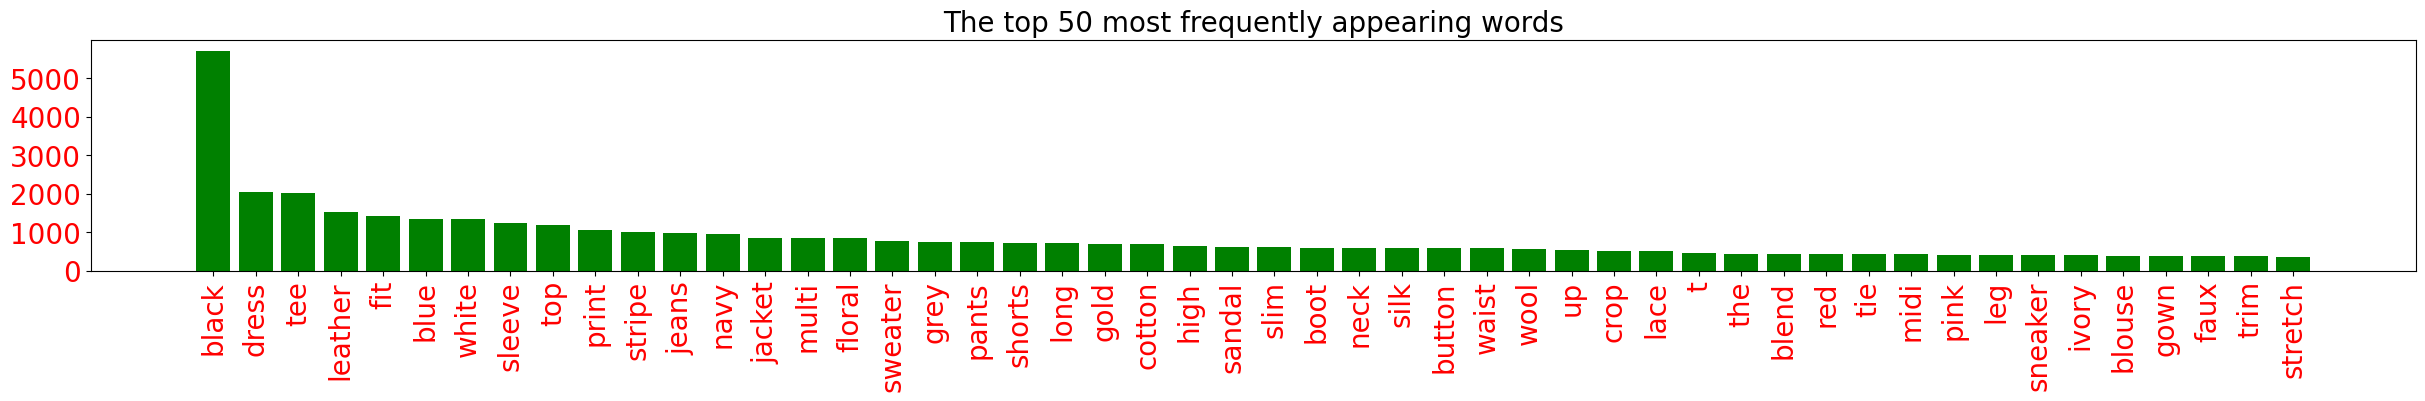

In [11]:
topn = 50

plthist(train_word_cnt.iloc[:topn,:], title = str.format(f"The top {topn} most frequently appearing words"))

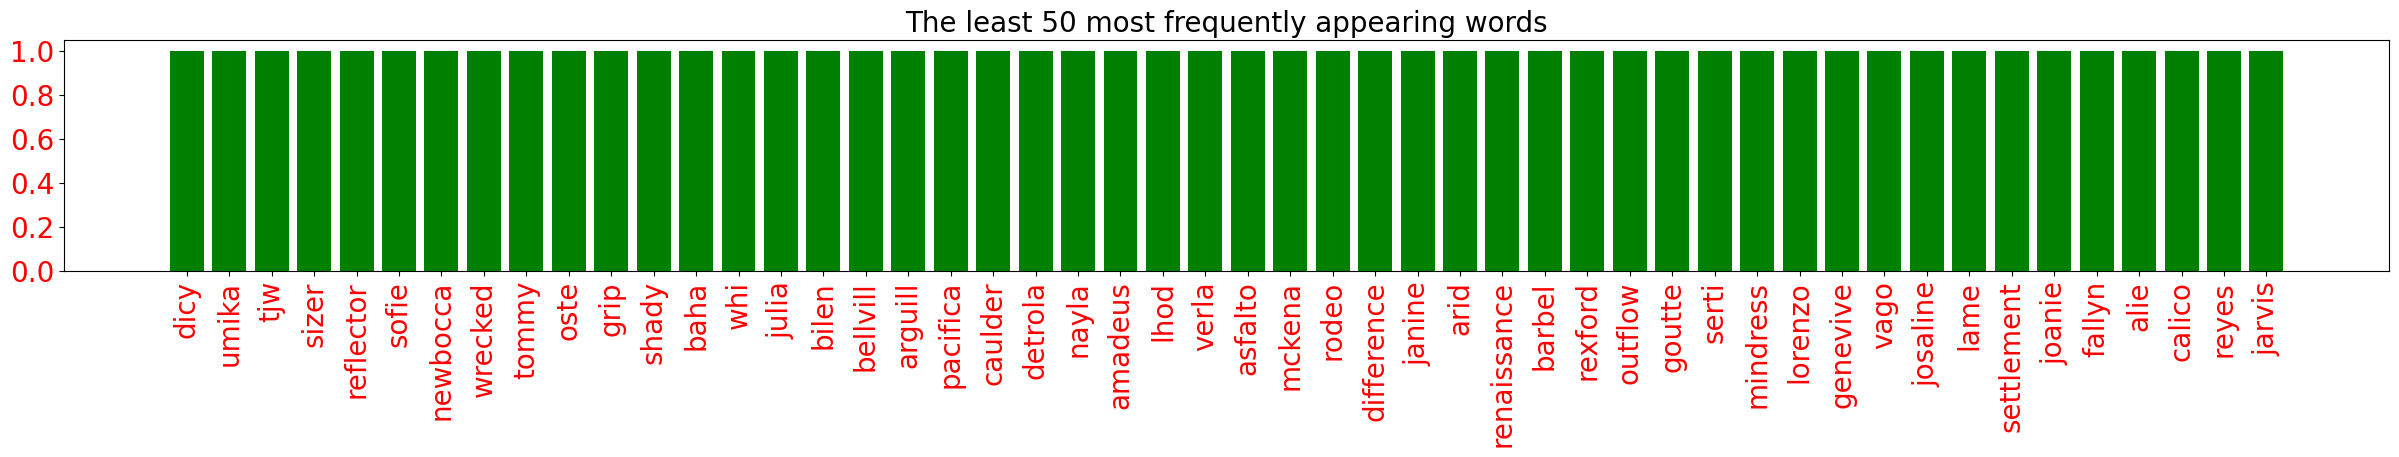

In [12]:
topn = 50

plthist(train_word_cnt.iloc[-topn:,:], title = str.format(f"The least {topn} most frequently appearing words"))

**Observation:**
1. Some of the least frequencty appearing words does not make sence. But we searched most of them are brand name the item belong to.
2. Top frequent words are the color of the product.


Let's look the same for the clean title

In [17]:
vocabulary = create_vocabulary(db_train, 'clean_title')
print("Vocabulary Size on train : {}".format(len(set(vocabulary))))

Vocabulary Size on train : 8630


In [18]:
train_word_cnt = df_word_count(db_train, vocabulary)

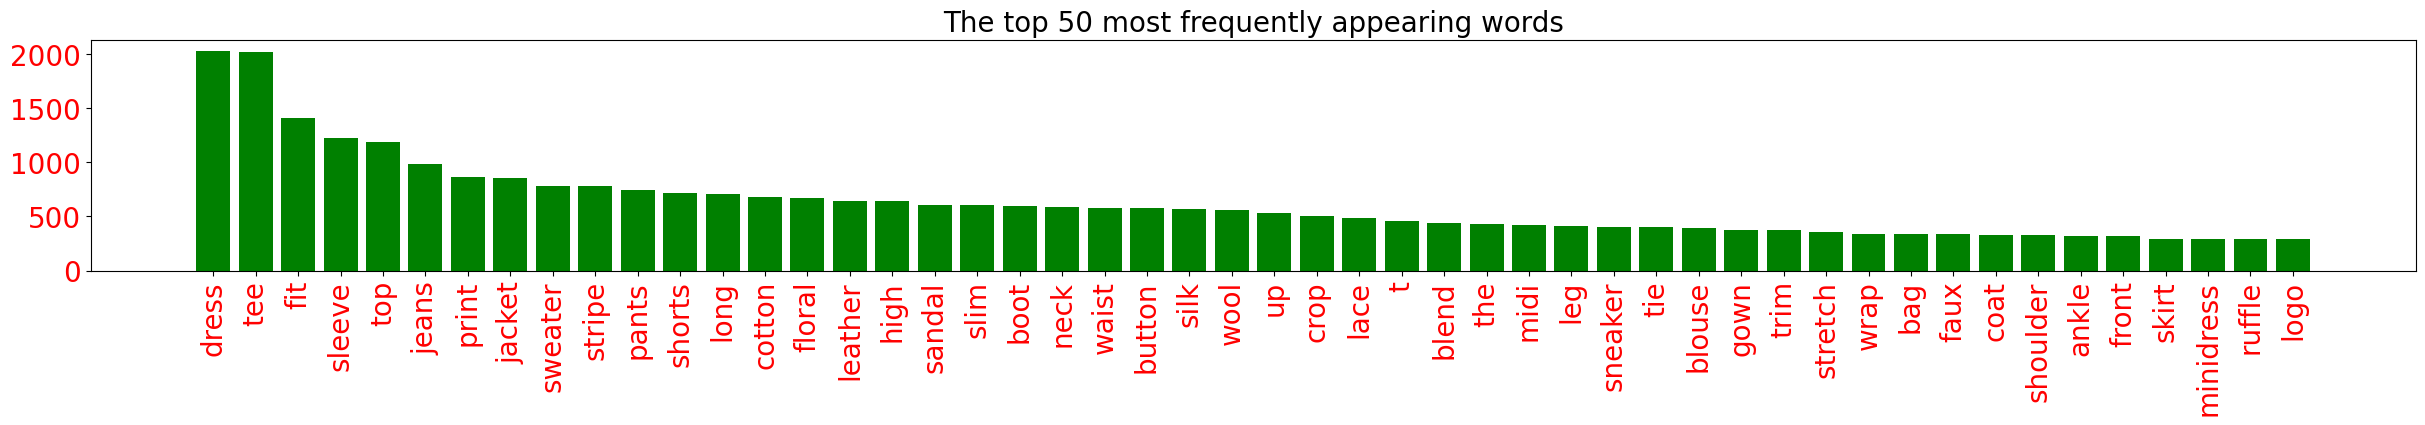

In [19]:
topn = 50

plthist(train_word_cnt.iloc[:topn,:], title = str.format(f"The top {topn} most frequently appearing words"))

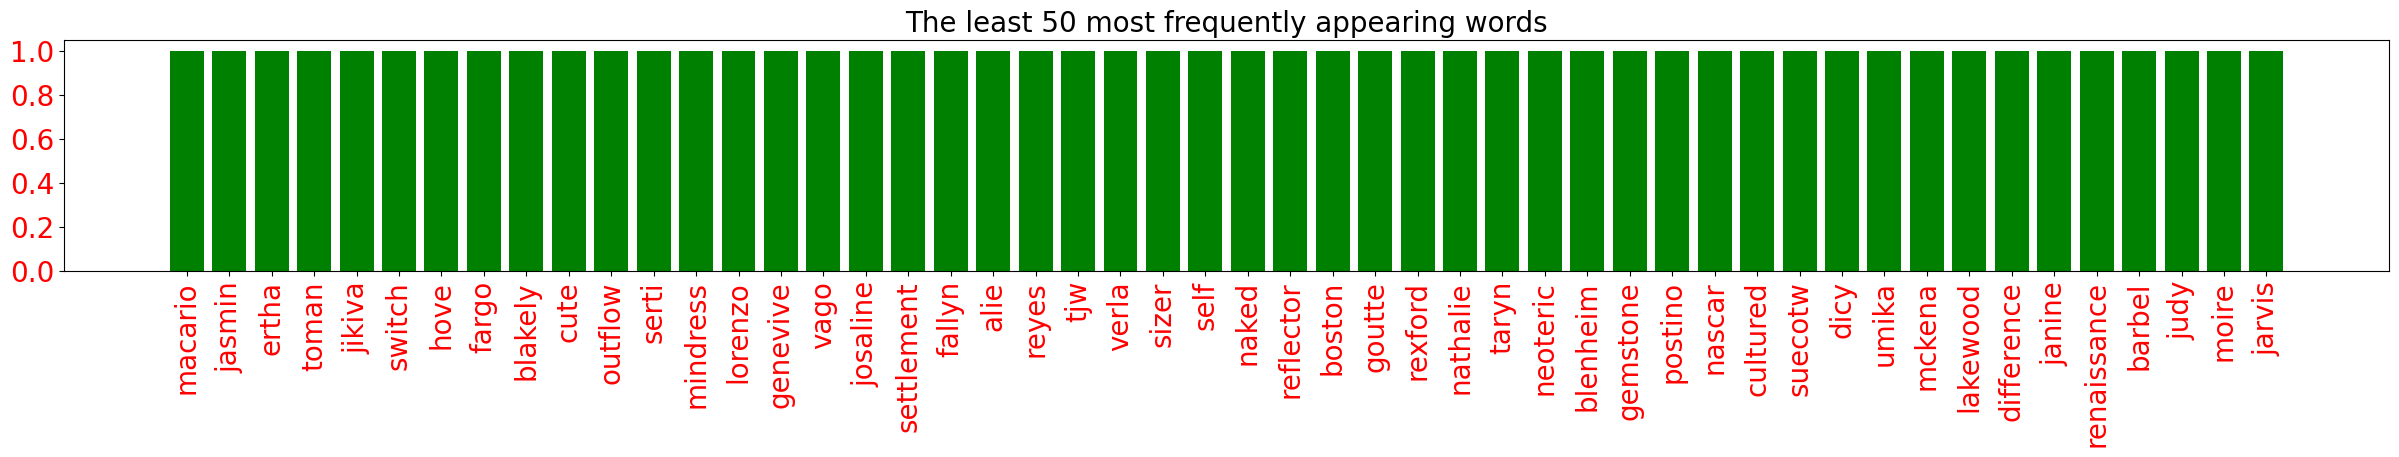

In [20]:
topn = 50

plthist(train_word_cnt.iloc[-topn:,:], title = str.format(f"The least {topn} most frequently appearing words"))

**Observartion:**

1. Most words in the are the type of the product, which in our case is 'dress'